# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [2]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [3]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [4]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [5]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

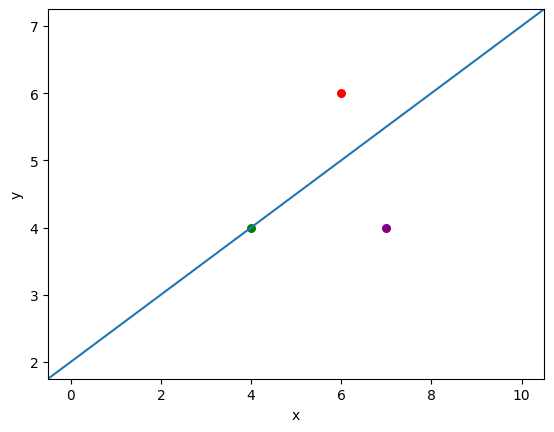

In [6]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [7]:
def generate_uniform_points(left, right, n = 10 ** 5):
    points = [(random.uniform(left, right), random.uniform(left, right)) for _ in range(n)]
    return points

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [8]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

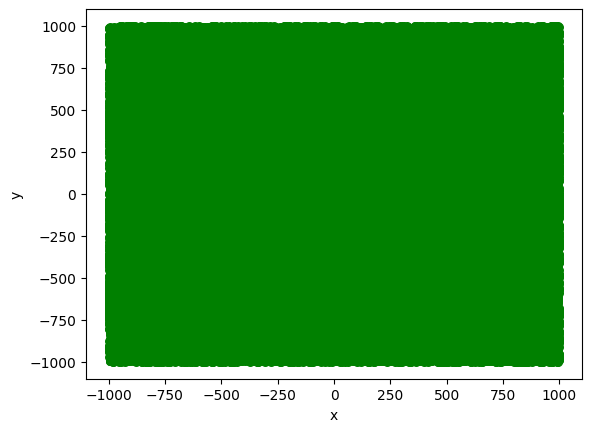

In [9]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [10]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

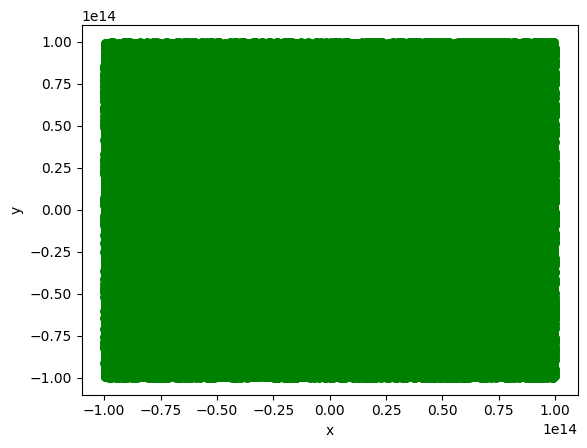

In [11]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [12]:
def generate_circle_points(O, R, n = 1000):
    x_center, y_center = O
    points = []

    for _ in range(n):
        # Generate a random angle in radians between 0 and 2*pi (360 degrees).
        angle = random.uniform(0, 2 * math.pi)

        # Calculate the x and y coordinates of the point on the circle.
        x = x_center + R * math.cos(angle)
        y = y_center + R * math.sin(angle)

        points.append((x, y))

    return points

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [13]:
points_c = generate_circle_points((0, 0), 1000)

Zwizualizuj wygenerowane punkty.

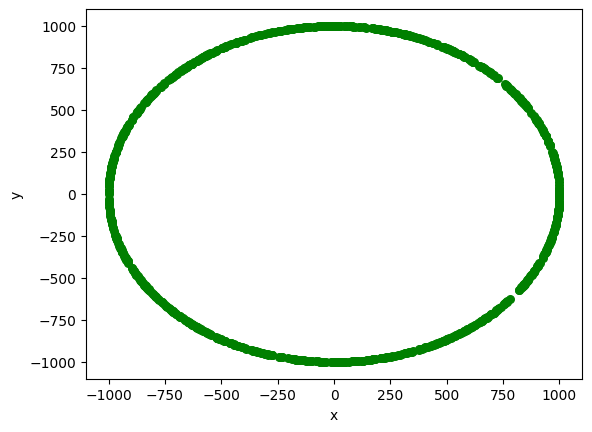

In [14]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [1]:
import random
def generate_collinear_points(a, b, n=100):
    x1, y1 = a
    x2, y2 = b
    c = (y1-y2)/(x1-x2)
    points = []

    for i in range(n):
        x = random.uniform(-1000, 1000)
        y = c*x + (y1 - c*x1)
        points.append((x, y))

    return points

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [5]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

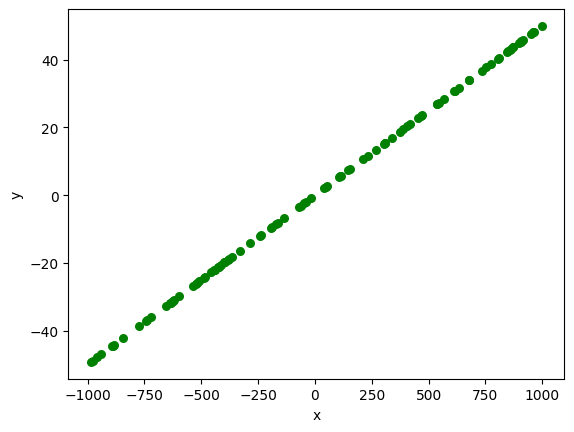

In [6]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [18]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.142s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [19]:
def mat_det_3x3(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c

    determinant = (b_x - a_x)*(c_y - b_y) - (b_y - a_y)*(c_x - b_x)
    return determinant

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [20]:
def mat_det_3x3_lib(a, b, c):
    matrix = np.array([
        [a[0], a[1], 1],
        [b[0], b[1], 1],
        [c[0], c[1], 1]
    ])
    determinant = np.linalg.det(matrix)
    return determinant

Uzupełnij funkcje ```mat_det_2x2```

In [21]:
def mat_det_2x2(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c

    determinant = (a_x - c_x)*(b_y-c_y) - (a_y - c_y) * (b_x - c_x)
    return determinant

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [22]:
def mat_det_2x2_lib(a, b, c):
    matrix = np.array([
        [a[0]-c[0], a[1]-c[1]],
        [b[0]-c[0], b[1]-c[1]] 
    ])
    determinant = np.linalg.det(matrix)
    return determinant

Przetestujmy napisane powyżej funkcje.

In [23]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.001s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [24]:
def categorize_points(points, a, b, mat_det_func, eps):
    left_points = []
    on_line_points = []
    right_points = []

    for point in points:
        det = mat_det_func(a, b, point)
        
        if det < -eps:
            left_points.append(point)
        elif det > eps:
            right_points.append(point)
        else:
            on_line_points.append(point)

    return left_points, on_line_points, right_points

In [25]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [26]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

In [27]:
print(len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

50306 0 49694


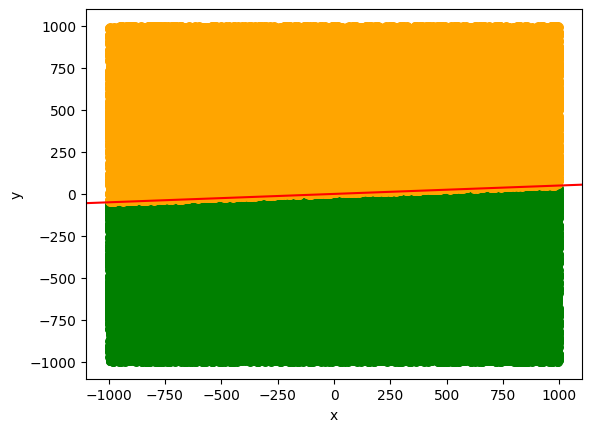

In [28]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [29]:
classified_points_a_left2,classified_points_a_mid2,classified_points_a_right2 = categorize_points(np.float32(points_a), a, b, mat_det_3x3_lib, 10 ** -1)

In [30]:
print(len(classified_points_a_left2),len(classified_points_a_mid2),len(classified_points_a_right2))

50304 9 49687


In [31]:
#draw_line(np.setdiff1d(classified_points_a_left2, classified_points_a_left), np.setdiff1d(classified_points_a_mid2, classified_points_a_mid ), np.setdiff1d(classified_points_a_right2, classified_points_a_right))

In [32]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -14)

In [33]:
print(len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

50133 0 49867


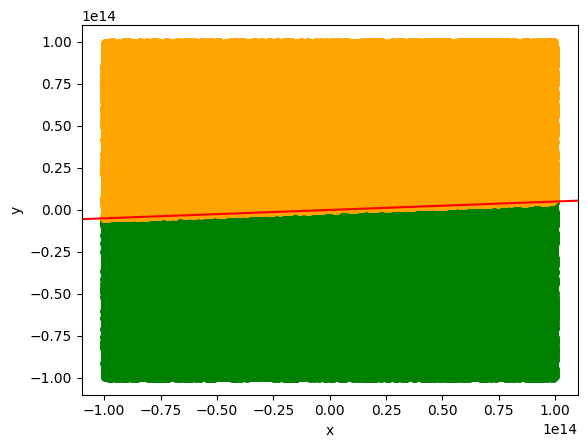

In [34]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [35]:
classified_points_b_left2,classified_points_b_mid2,classified_points_b_right2 = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -14)

In [36]:
print(len(classified_points_b_left2),len(classified_points_b_mid2),len(classified_points_b_right2))

50131 4 49865


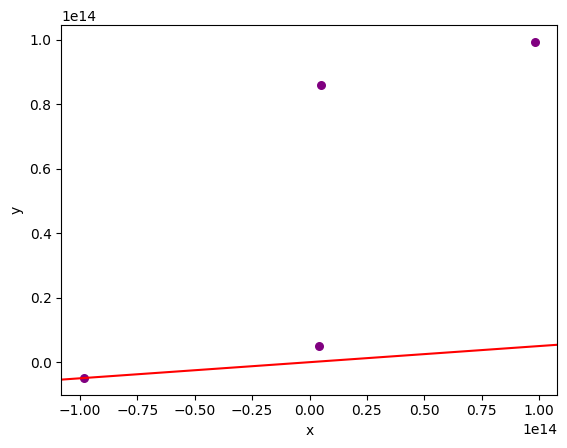

In [38]:
draw_line(np.setdiff1d(classified_points_b_left2, classified_points_b_left), np.setdiff1d(classified_points_b_mid2, classified_points_b_mid ), np.setdiff1d(classified_points_b_right2, classified_points_b_right))

In [39]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

In [40]:
print(len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

520 0 480


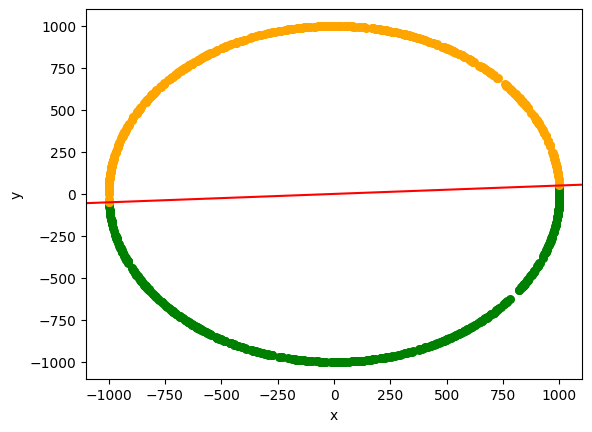

In [41]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [45]:
classified_points_c_left2,classified_points_c_mid2,classified_points_c_right2 = categorize_points(np.float32(points_c), a, b, mat_det_3x3, 10 ** -14)

In [46]:
print(len(classified_points_c_left2),len(classified_points_c_mid2),len(classified_points_c_right2))

520 0 480


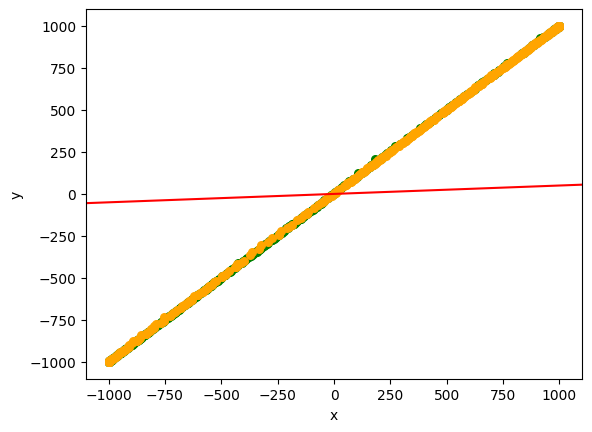

In [47]:
draw_line(np.setdiff1d(classified_points_c_left2, classified_points_c_left), np.setdiff1d(classified_points_c_mid2, classified_points_c_mid ), np.setdiff1d(classified_points_c_right2, classified_points_c_right))

In [51]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -12)

In [52]:
print(len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

0 100 0


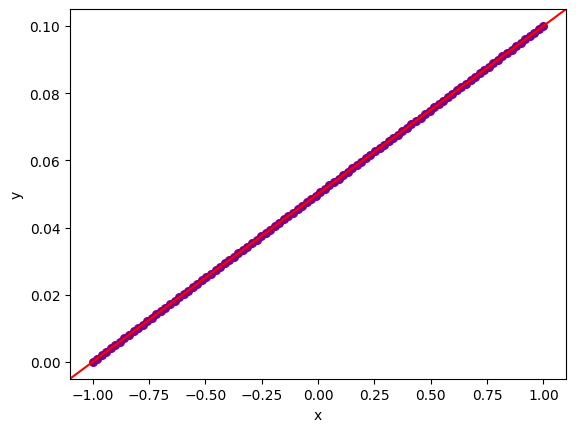

In [53]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [54]:
classified_points_d_left2,classified_points_d_mid2,classified_points_d_right2 = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -20)

In [55]:
print(len(classified_points_d_left2),len(classified_points_d_mid2),len(classified_points_d_right2))

38 27 35


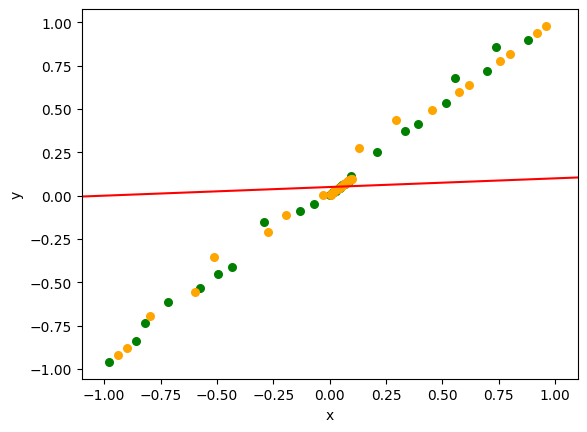

In [56]:
draw_line(np.setdiff1d(classified_points_d_left2, classified_points_d_left), np.setdiff1d(classified_points_d_mid2, classified_points_d_mid ), np.setdiff1d(classified_points_d_right2, classified_points_d_right))

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [ ]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
